# Project: TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The primary goal of the project is to go through the general data analysis process — using basic data analysis technique with NumPy, pandas, and Matplotlib. The movie dataset, which is originally from Kaggle, was cleaned and provided by Udacity. According Kaggle introduction page, the data contains information that are provided from The Movie Database (TMDb). It collects 5000+ movies basic move information and movie matrices, including user ratings, popularity and revenue data. These metrics can be seen as how successful these movies are. The movie basic information contained like cast, director, keywords, runtime, genres, etc.

### Attributes in the dataset

* *popularity:*

* *budget:*

* *revenue:* 

* *original_title:*

* *cast:* 

* *director:* 

* *runtime:* 

* *genres:*

* *production_companies:*

* *release_date:*

* *vote_count:*

* *vote_average:*

* *release_year:*

## Data Wrangling

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



### General Properties

In [2]:
# load the dataset
df = pd.read_csv('C:\\Users\\user\\Downloads\\Datasets\\tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# check for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [4]:
# check for duplicate rows
df.duplicated().sum()

1

In [5]:
# get more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# descriptive statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


There are zero values in some rows of budget, revenue and runtime. We will find the counts to in order to decide if they should be dropped or be filled with some values for analyses

In [7]:
# Use groupby() and count() functions to get the counts of zero values in budget, revenue and runtime 
df_budget_count = df.groupby('budget').count()['id']
df_revenue_count = df.groupby('revenue').count()['id']
df_runtime_count = df.groupby('runtime').count()['id']

In [8]:
# Budget Count
df_budget_count.head()

budget
0    5696
1       4
2       1
3       3
5       1
Name: id, dtype: int64

In [9]:
# Revenue Count
df_revenue_count.head()

revenue
0    6016
2       2
3       3
5       2
6       2
Name: id, dtype: int64

In [10]:
# Runtime Count
df_runtime_count.head()

runtime
0    31
2     5
3    11
4    17
5    17
Name: id, dtype: int64

**The following were observed in the dataset so far:**

* Duplicate rows in the dataset would be dropped

* Rename 'original_title' as 'title' and move it to be beside 'id' 

* Unnecessary columns not needed for our analyses would be dropped: 'imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj', and 'keywords'

* Rows with lesser null values in 'cast', 'genres' and 'directors' would be dropped

* 'budget' and 'revenue' columns have lots of zero values, hence dropping them won't be a good idea. Therefore, the '0' values would be kept and replaced with null values

* Drop zero values of 'runtime' as it has lesser zero values

* Certain columns such as 'cast', and 'genres' have multiple values separated by "|", and so the rows would be separated 

* Create a new column 'profit' which is the difference between 'revenue' and 'profit' and and place it after 'revenue' column

### Data Cleaning

In [11]:
# Drop columns not necessary
df.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj', 'keywords'], axis=1, inplace=True)
# check
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [12]:
# Drop duplicate values
df.drop_duplicates(inplace=True)

# check for duplicates
df.duplicated().sum()

0

In [13]:
# Drop null values in cast, genres and director columns
null_values = ['cast', 'genres', 'director']
df.dropna(subset = null_values, how = 'any', inplace=True)

# check for null values in cast, genres and director columns
print(df['cast'].isnull().sum())
print(df['genres'].isnull().sum())
print(df['director'].isnull().sum())

0
0
0


In [14]:
# Rename 'original_title' with 'title' using rename() function
df.rename(columns = {'original_title': 'title'}, inplace=True)

# check
df.head(1)

,id,popularity,budget,revenue,title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [15]:
# Move 'title' to the second_column after 'id' column with pop() and insert() functions
second_column = df.pop('title')
df.insert(1, 'title', second_column)

# Check
df.head(1)

,id,title,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,Jurassic World,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [16]:
# replace zero values in 'budget' and 'revenue' columns with null values
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
# check if null values are added to budget and revenue columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10731 non-null  int64  
 1   title                 10731 non-null  object 
 2   popularity            10731 non-null  float64
 3   budget                5153 non-null   float64
 4   revenue               4843 non-null   float64
 5   cast                  10731 non-null  object 
 6   director              10731 non-null  object 
 7   runtime               10731 non-null  int64  
 8   genres                10731 non-null  object 
 9   production_companies  9772 non-null   object 
 10  release_date          10731 non-null  object 
 11  vote_count            10731 non-null  int64  
 12  vote_average          10731 non-null  float64
 13  release_year          10731 non-null  int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


In [17]:
# filtering runtime with zero values
df.query('runtime != 0', inplace=True)
# check
df.query('runtime == 0')

,id,title,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


In [18]:
# check the descriptive statistics again
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10703.000000,10703.000000,5.150000e+03,4.843000e+03,10703.000000,10703.000000,10703.000000,10703.000000
mean,64904.988321,0.653818,3.084401e+07,8.933981e+07,102.736896,220.333178,5.966112,2001.235355
std,91161.996308,1.005687,3.893782e+07,1.621546e+08,30.079331,579.481969,0.930155,12.825920
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,10538.500000,0.211533,6.000000e+06,7.779664e+06,90.000000,17.000000,5.400000,1995.000000
50%,20235.000000,0.388036,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000
75%,73637.000000,0.722438,4.000000e+07,1.000000e+08,112.000000,149.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


There are no zero values again in the budget, revenue and runtime 

In [19]:
# create a new column 'profit' where 'profit' = 'revenue' - 'budget'
df['profit'] = df['revenue'] - df['budget']
# check
df.head(1)

,id,title,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,135397,Jurassic World,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.363529e+09


In [20]:
# move 'profit' to the 6th column
sixth_column = df.pop('profit')
df.insert(5, 'profit', sixth_column)
# check
df.head(1)

,id,title,popularity,budget,revenue,profit,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,Jurassic World,32.985763,150000000.0,1.513529e+09,1.363529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


## Explorative Data Analysis

### Question 1: What is the trend of the movie popularity over the years?

In [21]:
popularity_mean = df.groupby('release_year').mean()['popularity']
popularity_mean.head()

release_year
1960    0.458932
1961    0.422827
1962    0.454783
1963    0.502706
1964    0.412428
Name: popularity, dtype: float64

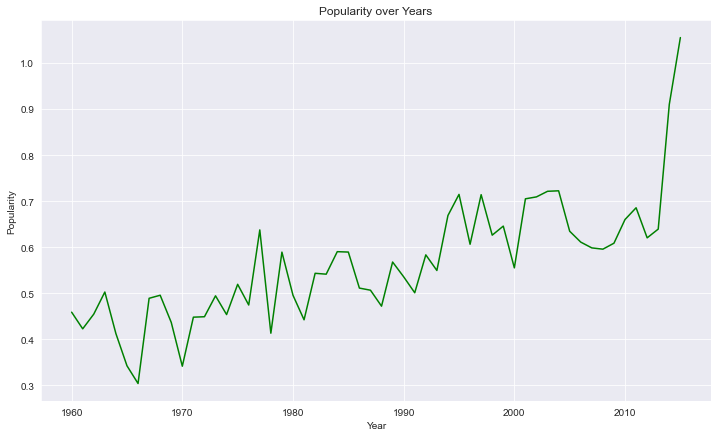

In [22]:
# visualization
sns.set_style('darkgrid')
x = popularity_mean.index
y = popularity_mean
plt.figure(figsize=(12,7))
plt.plot(x, y, color='green')
plt.title('Popularity over Years')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show();

From the above graph, it can be deduced that popularity of movies is going upward in recent years.

### Question 2: What are the budget and revenue trends over the years? 

In [23]:
budgets = df.groupby('release_year').mean()['budget']
revenues = df.groupby('release_year').mean()['revenue']

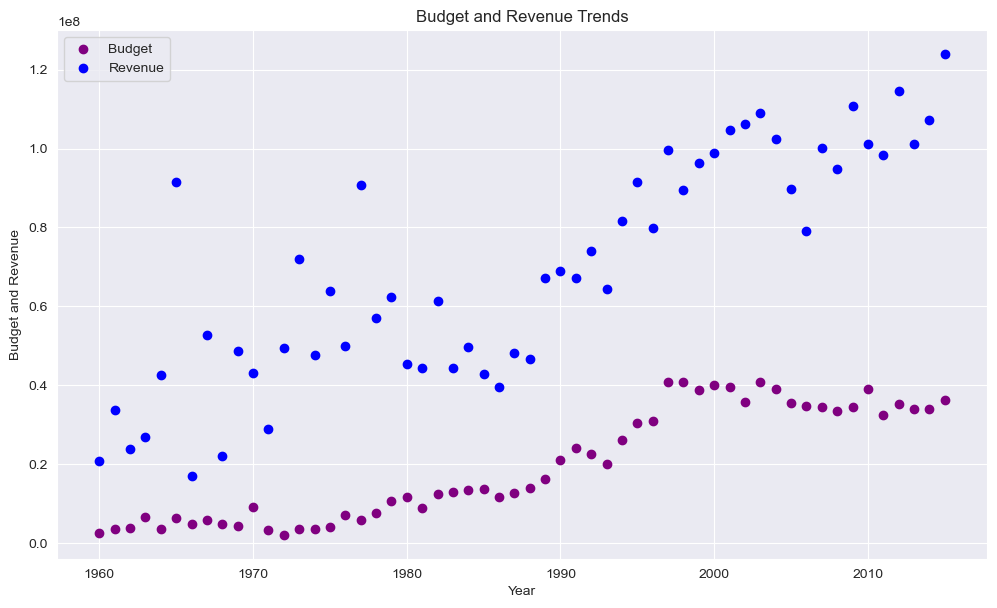

In [24]:
# visualization
sns.set_style('darkgrid')
x1 = budgets.index
y1 = budgets
x2 = revenues.index
y2 = revenues
plt.figure(figsize=(12,7), dpi = 100)
plt.scatter(x1, y1, color ='purple', label='Budget')
plt.scatter(x2, y2, color='blue', label='Revenue')
plt.title('Budget and Revenue Trends')
plt.xlabel('Year')
plt.ylabel('Budget and Revenue')
plt.legend(loc='upper left')
plt.show();

The graph above shows that Budget and Revenue tends to grow year over year, this trend seems to continue.

### Question 3: What are the profit and revenue trends over the years?

In [25]:
profits = df.groupby('release_year').mean()['profit']
revenues = df.groupby('release_year').mean()['revenue']

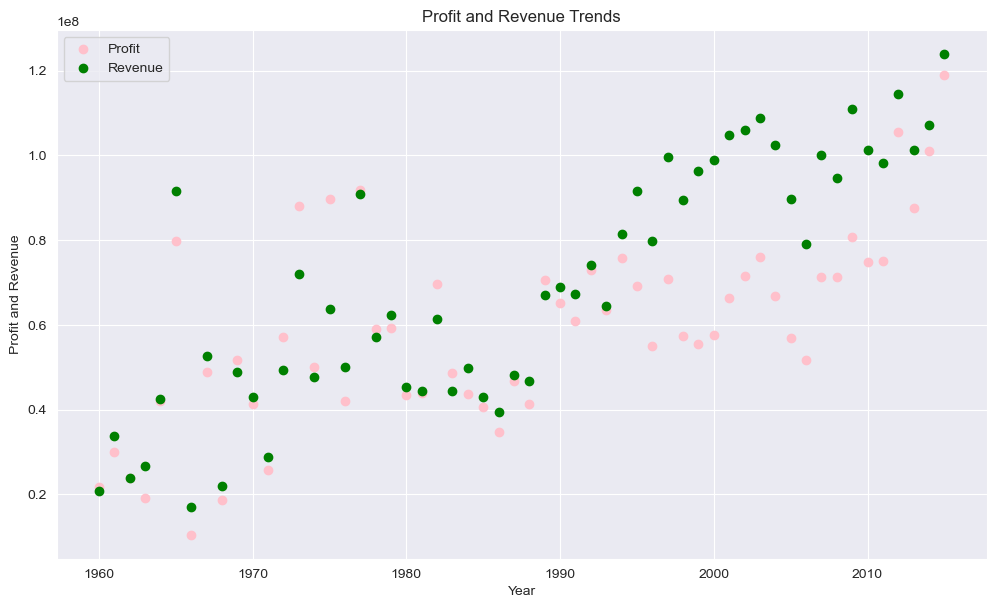

In [26]:
# visualization
sns.set_style('darkgrid')
x1 = profits.index
y1 = profits
x2 = revenues.index
y2 = revenues
plt.figure(figsize=(12,7), dpi = 100)
plt.scatter(x1, y1, color ='pink', label='Profit')
plt.scatter(x2, y2, color='green', label='Revenue')
plt.title('Profit and Revenue Trends')
plt.xlabel('Year')
plt.ylabel('Profit and Revenue')
plt.legend(loc='upper left')
plt.show();

The graph above shows that Profit and Revenue tends to grow year over year, and the trend patterns seem to be similar.

### Question 4: What can you deduced from the number of movies released year by year?

In [27]:
movies = df.groupby('release_year').count()['id']
movies.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

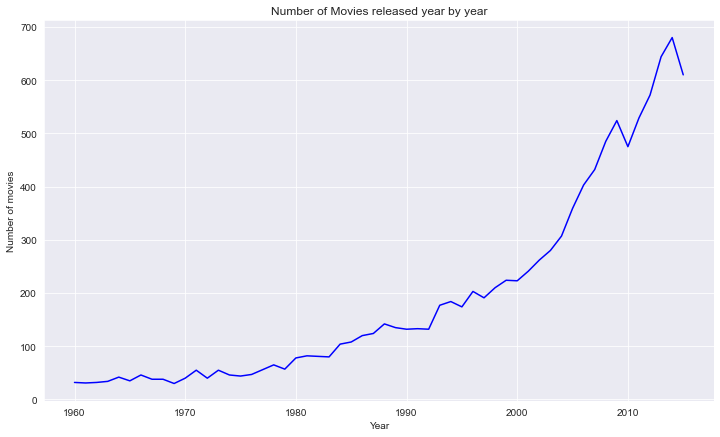

In [28]:
# visualization
sns.set_style('darkgrid')
x = movies.index
y = movies
plt.figure(figsize=(12,7))
plt.plot(x, y, color='blue')
plt.title('Number of Movies released year by year')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.show();

From the above graph, it can be seen that there is a huge increase in the rate of movies year by year.

**To find the average runtime, budget, revenue, profit of movies whose popularity is above average, we neeed to first filter the dataframe**

In [29]:
# filtering the df for above average popularity
average_pop = df['popularity'].mean()
average_pop

0.6538184480052321

In [30]:
# assigning a new dataframe for filtered values
df_popularity = df[df['popularity'] >= average_pop]

#reindexing new dataframe
df_popularity.index = range(len(df_popularity))

df_popularity.head(2)

,id,title,popularity,budget,revenue,profit,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,Jurassic World,32.985763,150000000.0,1.513529e+09,1.363529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,Mad Max: Fury Road,28.419936,150000000.0,3.784364e+08,2.284364e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


### Question 5A: What is the average duration of movies based on popularity ?

In [31]:
def avg_fun(column_name):
    return df_popularity[column_name].mean()
    

In [32]:
# finding the average runtime of movies above average
avg_fun('runtime')

107.84551769765135

The average runtime movies of above average popularity is 107 minutes.

### Question 5B: What is the average budget of movies based on popularity? 

In [33]:
avg_fun('budget')

46649444.30747475

The average budget movies of above average popularity is over 46 Million Dollars.

### Question 5C: What is the average revenue of movies based on popularity?

In [34]:
avg_fun('revenue')

148141097.7749004

The average revenue movies of above average popularity is over 148 Million Dollars.

### Question 5D: What is the average profit of movies based on popularity?

In [35]:
avg_fun('profit')

110332893.3224543

The average profit movies of above average popularity is over 110 Million Dollars

### Question 6: Which director directed most films based on popularity?

In [36]:
# to find the top directors, cast and genres of movie 
#first we need to filter the rows as they are seperated by a "|" symbol and then count them
def filter_row(column_name):
    new_df = df_popularity[column_name].str.cat(sep= '|')
    new_df = pd.Series(new_df.split('|'))
    counts = new_df.value_counts(ascending = False)
    return counts

In [37]:
# top directors
director = filter_row('director')
director.head(10)

Steven Spielberg     22
Clint Eastwood       18
Ridley Scott         16
Tim Burton           16
Ron Howard           15
Martin Scorsese      15
Robert Zemeckis      14
Richard Donner       13
Steven Soderbergh    13
Woody Allen          13
dtype: int64

**Steven Spielberg is the most popular director with 22 Movies that are most popular**

Also other directors taking the stage with him are Clint Eastwood, Ridley Scott, Tim Burton and Ron Howard etc. Movies directed by these directors tend to be more popular than others But since we don't really know how many movies the directors directed in total in their lifetime, we can't say for sure that movies directed by above directors will always be this popular but gives us the idea that how much likely it is when it is directed by them.

### Question 7: Which cast has appeared the most based on popularity?

In [38]:
# top casts
cast = filter_row('cast')
cast.head(10)

Robert De Niro        44
Bruce Willis          39
Nicolas Cage          39
Samuel L. Jackson     39
Johnny Depp           32
Brad Pitt             32
Tom Cruise            31
Sylvester Stallone    29
Matt Damon            29
Jason Statham         29
dtype: int64

**Robert De Niro is the most popular director with 44 Movies that are most popular.**

Also other cast taking the stage with him are Nicolas Cage, Samuel L. Jackson, Bruce Willis, Brad Pitt etc. Movies acted by these cast tend to be more popular than others.

As we said for the directors, the same goes for the actors too as well! Since we don't really know how many movies these actors have acted in total in their lifetime, we can't always be sure that movies acted by these actors will always be popular this much but gives us the idea that how much likely it is when it is acted by them.

### Question 8: Which genres are more successful based on popularity?

In [39]:
# top genres
genre = filter_row('genres')
genre.head(10)

Drama              1238
Comedy             1083
Thriller            940
Action              883
Adventure           654
Crime               491
Romance             482
Family              452
Science Fiction     449
Fantasy             385
dtype: int64

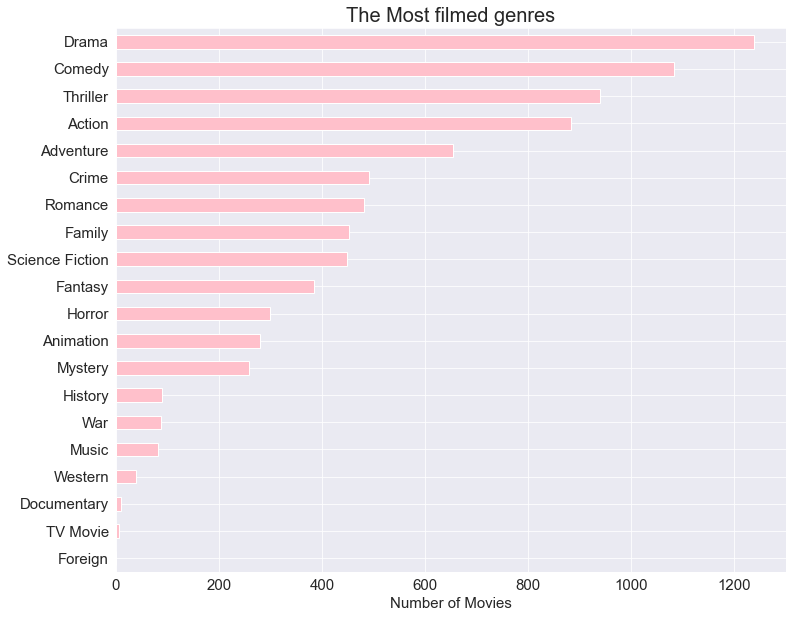

In [40]:
# visualization
sns.set_style('darkgrid')

genre.sort_values(ascending = True, inplace = True)

#initializing plot
ax = genre.plot.barh(color = 'pink', fontsize = 15)
ax.set_title('The Most filmed genres',size =20)
ax.set_xlabel('Number of Movies', fontsize = 15)
ax.figure.set_size_inches(12, 10)
plt.show()

**Drama is the most popular Genre with over 1200+ Movies that are most popular.**

Comedy, Thriller, Action etc. takes the next position with over 800+ movies. Looks like Western, Documentary, TV Movie and Foreign Generes are the least popular with less than 100 Movies.

### Question 9: Which production companies are more successful based on popularity?


In [41]:
# top production companies
production_companies = filter_row('production_companies')
production_companies.head(10)

Warner Bros.                              272
Universal Pictures                        248
Paramount Pictures                        197
Twentieth Century Fox Film Corporation    156
Columbia Pictures                         141
Walt Disney Pictures                      130
New Line Cinema                           118
Relativity Media                           87
Metro-Goldwyn-Mayer (MGM)                  80
Touchstone Pictures                        71
dtype: int64

**Warner Bros. is the most popular production company with 272 Movies that are most popular.**

Also other Production Compaines taking the stage with him are Universal Pictures, Paramount Pictures, Twentieth Century Fox Film Corporation etc. Movies produced by these production comapnies tend to be more popular than others.

## Conclusions

The Investigation shows us that -

1. The popularity of movies is going upward in recent years.

2. The Budget and Revenue tends to grow year over year, this trend seems to continue.

3. The Profit and Revenue tends to grow year over year, and their trends are similar in pattern.

4. There is a huge increase in the rate of movies year by year.

Features associated with popular movies are :

1. Average Runtime = 107 minutes.

2. Average Budget = 46 Million Dollars.

3. Average Revenue = 148 Million Dollars.

4. Average Profit = 110 Million Dollars

5. Cast associated with high popularity movies are Robert De Niro and Nicolas Cage;

6. Director associated with high popularity movies are Steven Spielberg and Clint Eastwood;

7. Genres associated with high popularity movies are drama, comedy, and thriller;

8. Production Companies associated with high popularity movies are Warner Bros., Universal Pictures and Paramount Pictures.

## Limitations


1. Units in Budget, Revenue, and Profit columns are undefined, it might be possible different movies have different currency according to the country they are produce in.

2. Characterising movies based on popularity is just one factor that is taken into account.

3. Data Quality - Most of the values are 0 in budget, revenue and runtime column, I would assume that they are missing.

4. The metrics of Popularity and vote counts data is undefined.